# Importar librerías necesarias

In [70]:
# Importar herramientas para análisis y visualización

# Se importan las librerías necesarias para análisis y visualización
import pandas as pd           # pandas: manejo de tablas y datos (muy usado en Data Science)

# Se importan las librerías necesarias para análisis y visualización
import matplotlib.pyplot as plt  # matplotlib: gráficos básicos

# Se importan las librerías necesarias para análisis y visualización
import seaborn as sns         # seaborn: gráficos con estilo, construye sobre matplotlib

# Se importan las librerías necesarias para análisis y visualización
import folium                 # folium: mapas interactivos (opcional, extra)

# A veces se ve mejor así

In [71]:
# Elegir un estilo de gráficos más “bonito”
sns.set_style("whitegrid")

# Cargar los archivos desde GitHub

In [72]:
# Lista manual de nombres de archivo
nombres_archivos = {
    1: "tienda_1 .csv",
    2: "tienda_2.csv",
    3: "tienda_3.csv",
    4: "tienda_4.csv"
}

# URL base
url_base = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/"

# Diccionario para guardar las tiendas

In [73]:
# Diccionario para guardar los DataFrames
tiendas = {}

# Probamos cargar una por una

In [74]:
# Cargar los archivos
for i, archivo in nombres_archivos.items():
# Se reemplaza el espacio con %20 para que la URL sea válida en la web
    archivo_sin_espacios = archivo.replace(" ", "%20")  # ← codifica espacios en URL
    url = url_base + archivo_sin_espacios
# Se intenta ejecutar el bloque de código a continuación (puede fallar)
    try:
# Se lee el archivo CSV directamente desde la URL de GitHub
        tiendas[i] = pd.read_csv(url)
        print(f"Tienda {i} cargada con {tiendas[i].shape[0]} registros")
# Si hay un error al leer el archivo, se captura y se muestra el mensaje
    except Exception as e:
        print(f"Error al cargar Tienda {i}: {e}")

Tienda 1 cargada con 2359 registros
Tienda 2 cargada con 2359 registros
Tienda 3 cargada con 2359 registros
Tienda 4 cargada con 2358 registros


# Ingreso total por tienda

In [75]:
print("\n--- Ingresos totales por tienda ---")
ingresos_totales = {}
for i, data in tiendas.items():
# Se suman los valores (por ejemplo, ingresos totales)
    ingresos_totales[i] = data['Precio'].sum()
    print(f"Tienda {i}: ${ingresos_totales[i]:,.2f}")


--- Ingresos totales por tienda ---
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


# Gráfico de ingresos

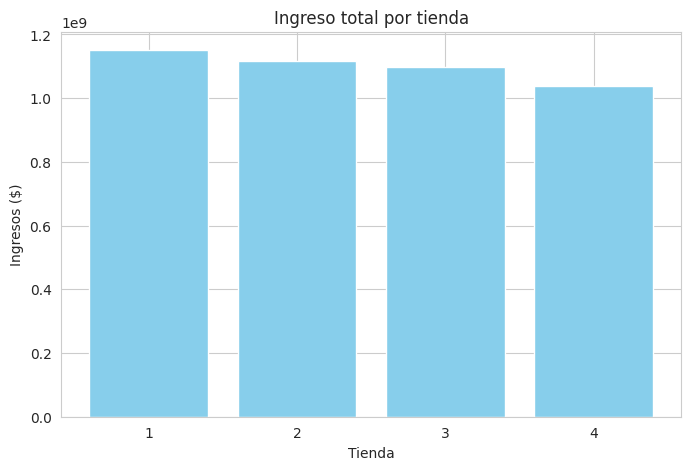

In [76]:
# Se genera una visualización con matplotlib
plt.figure(figsize=(8,5))
# Se genera una visualización con matplotlib
plt.bar(ingresos_totales.keys(), ingresos_totales.values(), color='skyblue')
# Se genera una visualización con matplotlib
plt.title("Ingreso total por tienda")
# Se genera una visualización con matplotlib
plt.xlabel("Tienda")
# Se genera una visualización con matplotlib
plt.ylabel("Ingresos ($)")
# Se genera una visualización con matplotlib
plt.xticks([1,2,3,4])
# Se genera una visualización con matplotlib
plt.show()

# Ventas por categoría

In [77]:
print("\n--- Ventas por Categoría del Producto ---")
for tienda_id, data in tiendas.items():
    print(f"\nTienda {tienda_id}")
# Se cuentan cuántas veces aparece cada categoría (o producto)
    print(data['Categoría del Producto'].value_counts())


--- Ventas por Categoría del Producto ---

Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Tienda 4
Categoría del Producto
Mue

# Calificación promedio por tienda

Tienda 1 tiene una Calificación promedio de: 3.98
Tienda 2 tiene una Calificación promedio de: 4.04
Tienda 3 tiene una Calificación promedio de: 4.05
Tienda 4 tiene una Calificación promedio de: 4.00


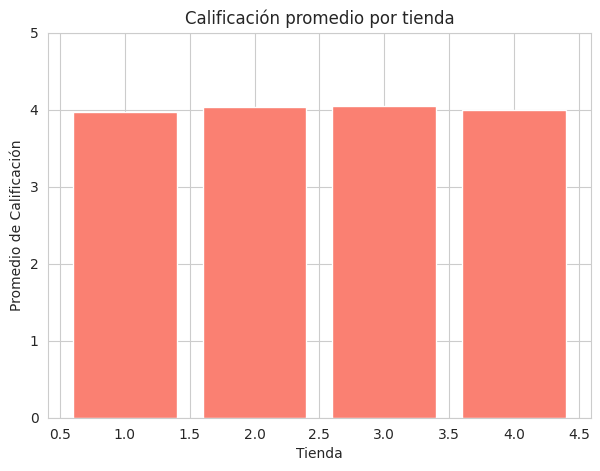

In [78]:
val_prom = {}
for i, data in tiendas.items():
# Se calcula el promedio de valores numéricos (como Precio, Calificación, etc.)
    val_prom[i] = data['Calificación'].mean()
    print(f"Tienda {i} tiene una Calificación promedio de: {val_prom[i]:.2f}")

# Se genera una visualización con matplotlib
plt.figure(figsize=(7,5))
# Se genera una visualización con matplotlib
plt.bar(val_prom.keys(), val_prom.values(), color='salmon')
# Se genera una visualización con matplotlib
plt.title("Calificación promedio por tienda")
# Se genera una visualización con matplotlib
plt.xlabel("Tienda")
# Se genera una visualización con matplotlib
plt.ylabel("Promedio de Calificación")
# Se genera una visualización con matplotlib
plt.ylim(0, 5)
# Se genera una visualización con matplotlib
plt.show()

# Productos más y menos vendidos

In [79]:
print("\n--- Productos más y menos vendidos por tienda ---")
for i, data in tiendas.items():
    print(f"\nTienda {i}")
# Se cuentan cuántas veces aparece cada categoría (o producto)
    productos = data['Producto'].value_counts()
    print(f"Más vendido: {productos.idxmax()} ({productos.max()} unidades)")
    print(f"Menos vendido: {productos.idxmin()} ({productos.min()} unidades)")


--- Productos más y menos vendidos por tienda ---

Tienda 1
Más vendido: Microondas (60 unidades)
Menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2
Más vendido: Iniciando en programación (65 unidades)
Menos vendido: Juego de mesa (32 unidades)

Tienda 3
Más vendido: Kit de bancas (57 unidades)
Menos vendido: Bloques de construcción (35 unidades)

Tienda 4
Más vendido: Cama box (62 unidades)
Menos vendido: Guitarra eléctrica (33 unidades)


# Costo de envío promedio


--- Costo de envío promedio por tienda ---
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


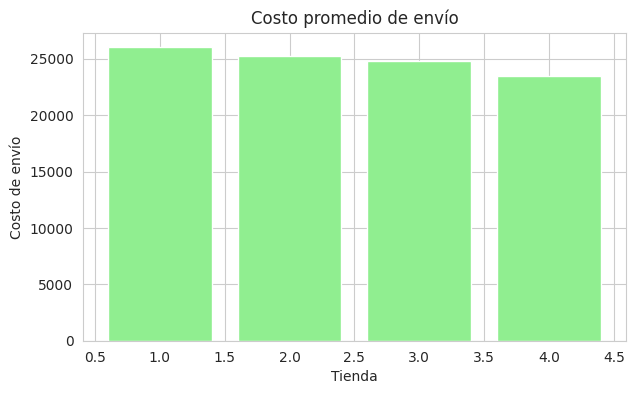

In [80]:
print("\n--- Costo de envío promedio por tienda ---")
prom_envios = {}
for i, data in tiendas.items():
# Se calcula el promedio de valores numéricos (como Precio, Calificación, etc.)
    prom_envios[i] = data['Costo de envío'].mean()
    print(f"Tienda {i}: ${prom_envios[i]:.2f}")

# Se genera una visualización con matplotlib
plt.figure(figsize=(7,4))
# Se genera una visualización con matplotlib
plt.bar(prom_envios.keys(), prom_envios.values(), color='lightgreen')
# Se genera una visualización con matplotlib
plt.title("Costo promedio de envío")
# Se genera una visualización con matplotlib
plt.xlabel("Tienda")
# Se genera una visualización con matplotlib
plt.ylabel("Costo de envío")
# Se genera una visualización con matplotlib
plt.show()

# Ingreso vs valoración (visualización combinada)

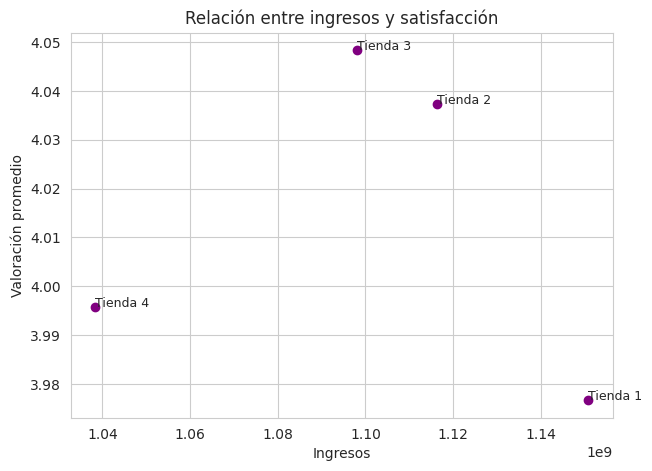

In [81]:
# Se genera una visualización con matplotlib
plt.figure(figsize=(7,5))
# Se genera una visualización con matplotlib
plt.scatter(ingresos_totales.values(), val_prom.values(), color='purple')
for i in ingresos_totales:
# Se genera una visualización con matplotlib
    plt.text(ingresos_totales[i], val_prom[i], f"Tienda {i}", fontsize=9)
# Se genera una visualización con matplotlib
plt.title("Relación entre ingresos y satisfacción")
# Se genera una visualización con matplotlib
plt.xlabel("Ingresos")
# Se genera una visualización con matplotlib
plt.ylabel("Valoración promedio")
# Se genera una visualización con matplotlib
plt.grid(True)
# Se genera una visualización con matplotlib
plt.show()

# EXTRA: Análisis geográfico

# Algunos archivos tienen lat/lon y otros no, así que revisamos primero

In [82]:
for i, data in tiendas.items():
    if 'lat' in data.columns and 'lon' in data.columns:
        print(f"\nMapa para tienda {i}")
# Se calcula el promedio de valores numéricos (como Precio, Calificación, etc.)
        mapa = folium.Map(location=[data['lat'].mean(), data['lon'].mean()], zoom_start=4)
        for idx, fila in data.iterrows():
# Se intenta ejecutar el bloque de código a continuación (puede fallar)
            try:
# Se genera un mapa con puntos usando la librería folium
                folium.CircleMarker(
                    location=[fila['lat'], fila['lon']],
                    radius=2,
                    color='blue',
                    fill=True,
                    fill_opacity=0.5
                ).add_to(mapa)
# Si hay un error al leer el archivo, se captura y se muestra el mensaje
            except:
                continue
        display(mapa)
    else:
        print(f"Tienda {i} no tiene coordenadas.")


Mapa para tienda 1



Mapa para tienda 2



Mapa para tienda 3



Mapa para tienda 4
